## Intro

### In this project I analyze and clusterize 2023 top Spotify songs.
As a result of the analysis I outlined 10 clusters of songs that made it into the top spotify songs of 2023.

**Cluster characteristics:**

Cluster 1 (**Oldies but goldies**) -> 36 songs, Released before 2020, Average total number of streams = 1.67 BN, High on spotify, apple and deezer playlists, Low on charts.

Cluster 2 (**Unpopular rap**) -> 112 songs, Somewhat high on danceability, Very high on speechiness, Low on streams, playlists and charts.

Cluster 3 (**Upbeat**)-> 298 songs, High danceability and valence metrics, Low on streams, playlists and charts.

Cluster 4 (**Performances**)-> 98 songs, High liveness metric, Relatively high energy metric, Low on streams, playlists and charts.

Cluster 5 (**Rising starts**) -> 20 songs, Released mostly in 2023 or 2022, High on spotify, apple and deezer charts, Extremely high on shazam charts, Mostly in the 120-156 bpm category.

Cluster 6 (**Acoustic**) -> 177 songs, High on acousticness metric, Low on energy, valence, daceability and speechiness, Mostly played in major mode, Low on streams, playlists and charts.

Cluster 7 (**Instrumental**) -> 16 songs, Very high on instrumnetalness metric, Low on energy, valence, daceability and speechiness, Low on streams, playlists and charts.

Cluster 8 (**Plateaued stars**) -> 125 songs, Released mostly in 2023 or 2022, High on spotify, apple and deezer charts, Somewhat high on shazaam charts, Low on streams, playlists.

Cluster 9 (**Popular hits**) -> 70 songs, Released before 2022, Average total number of streams = 1.77 BN, High on apple charts and spotify, apple, deezer playlists.

### Description:

This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

### Key Features:

**track_name:** Name of the song

**artist(s)_name:** Name of the artist(s) of the song

**artist_count:** Number of artists contributing to the song

**released_year:** Year when the song was released

**released_month:** Month when the song was released

**released_day:** Day of the month when the song was released

**in_spotify_playlists:** Number of Spotify playlists the song is included in

**in_spotify_charts:** Presence and rank of the song on Spotify charts

**streams:** Total number of streams on Spotify

**in_apple_playlists:** Number of Apple Music playlists the song is included in

**in_apple_charts:** Presence and rank of the song on Apple Music charts

**in_deezer_playlists:** Number of Deezer playlists the song is included in

**in_deezer_charts:** Presence and rank of the song on Deezer charts

**in_shazam_charts:** Presence and rank of the song on Shazam charts

**bpm:** Beats per minute, a measure of song tempo

**key:** Key of the song

**mode:** Mode of the song (major or minor)

**danceability_%:** Percentage indicating how suitable the song is for dancing

**valence_%:** Positivity of the song's musical content

**energy_%:** Perceived energy level of the song

**acousticness_%:** Amount of acoustic sound in the song

**instrumentalness_%:** Amount of instrumental content in the song

**liveness_%:** Presence of live performance elements

**speechiness_%:** Amount of spoken words in the song

## Libraries

In [1]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, FactorAnalysis
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
import scipy.cluster.hierarchy as sch

## Loading data

In [2]:
warnings.filterwarnings("ignore", category=Warning)

raw_spotify = pd.read_csv('spotify-2023.csv', encoding='iso-8859-1')
pd.set_option('display.max_columns', None)

raw_spotify.info()
print(raw_spotify.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

## Error correction

In [3]:
# Removing commas from values in 'in_deezer_playlists' and 'in_shazam_charts'
raw_spotify['in_deezer_playlists'] = raw_spotify['in_deezer_playlists'].str.replace(',', '')
raw_spotify['in_shazam_charts'] = raw_spotify['in_shazam_charts'].str.replace(',', '')

# Removing row with error cell "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3"
raw_spotify = raw_spotify[raw_spotify['streams'] != "BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3"]

# Converting columns to 'int64' data type
raw_spotify[['streams']] = raw_spotify[['streams']].astype('int64')
raw_spotify[['in_deezer_playlists']] = raw_spotify[['in_deezer_playlists']].astype('int64')

# Replacing the 95 missing values in 'key' as 'missing_key'
raw_spotify['key'] = raw_spotify['key'].fillna("missing_key")

# Imputing missing values in the column 'in_shazam_charts'
columns_for_imputation = ['artist_count', 'released_year', 'released_month', 'released_day', 'streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
imputer = IterativeImputer(random_state=42)
raw_spotify['in_shazam_charts'] = imputer.fit_transform(raw_spotify[columns_for_imputation])[:, 11]
raw_spotify['in_shazam_charts'] = raw_spotify['in_shazam_charts'].clip(lower=0)

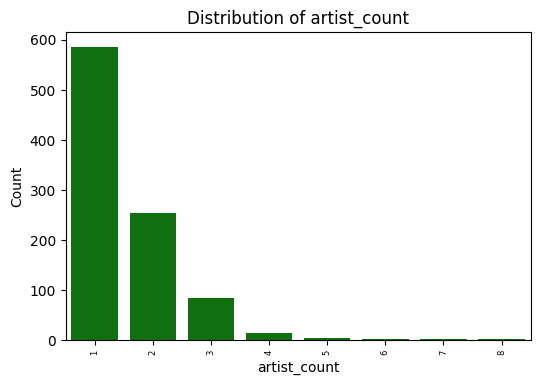

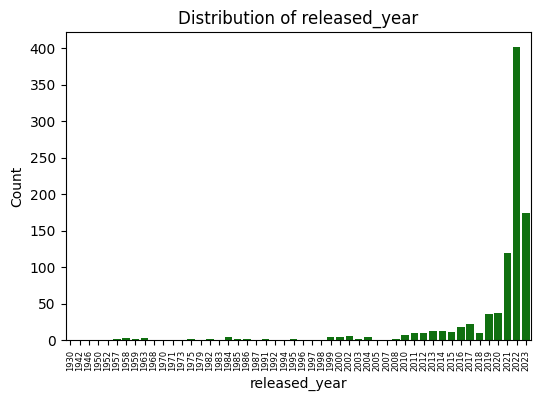

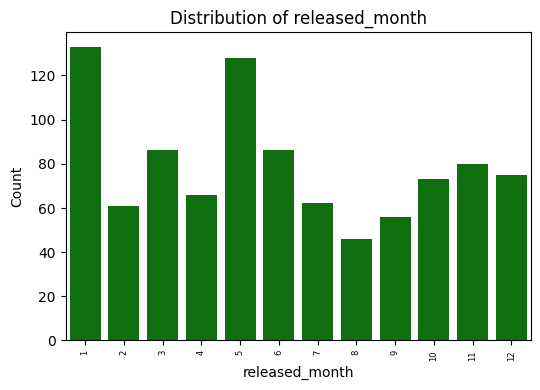

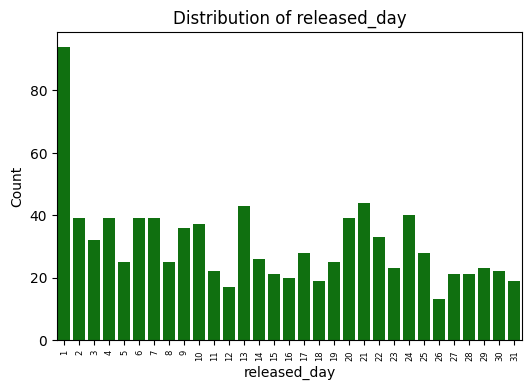

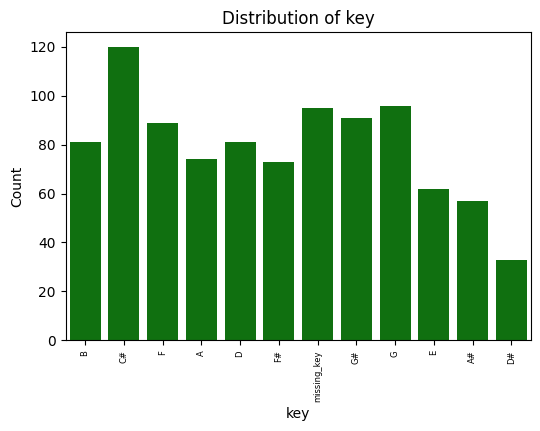

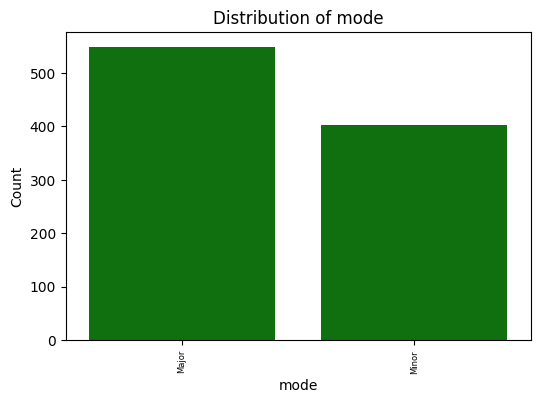

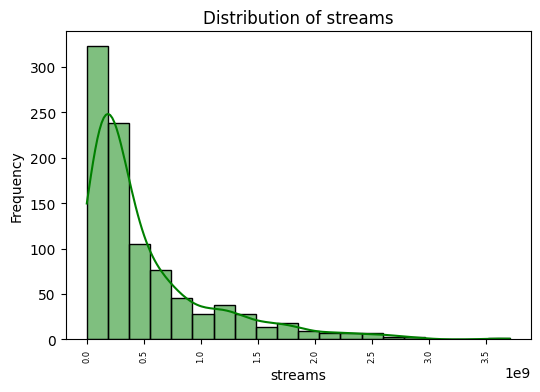

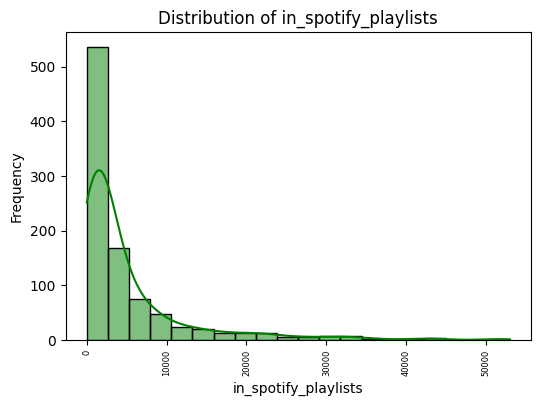

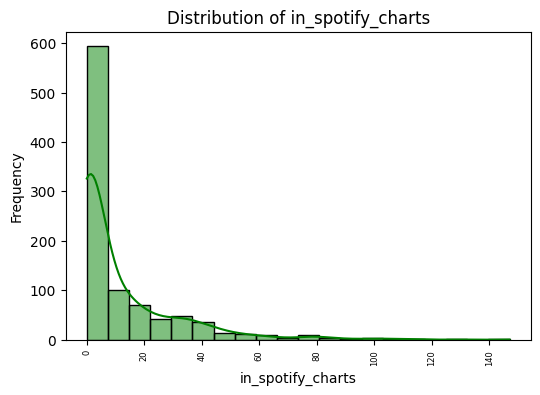

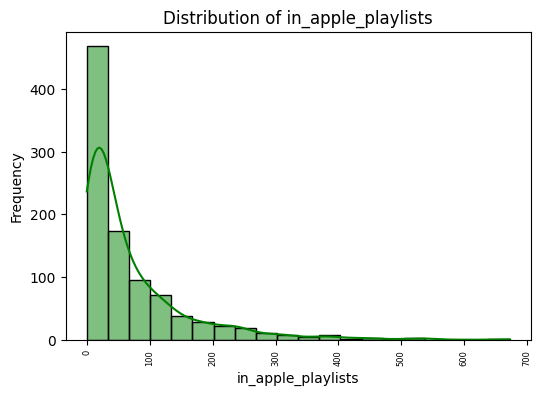

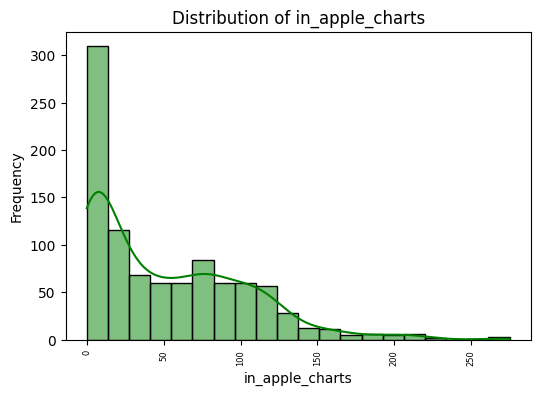

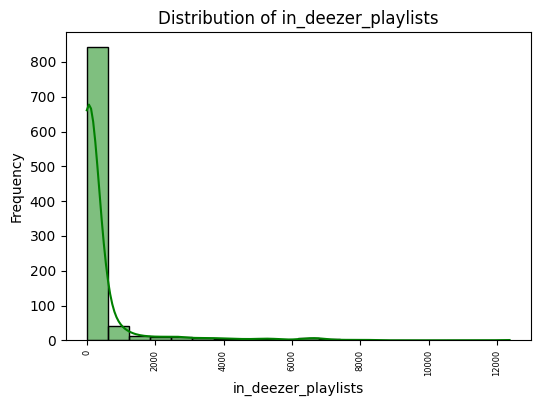

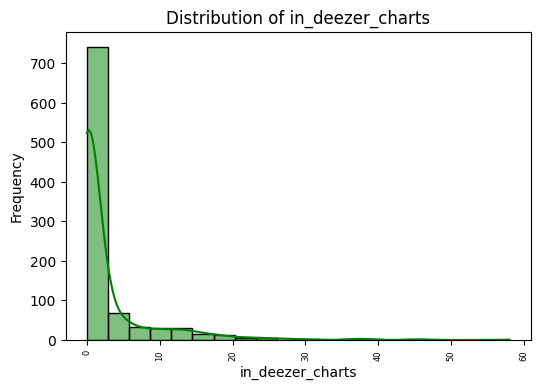

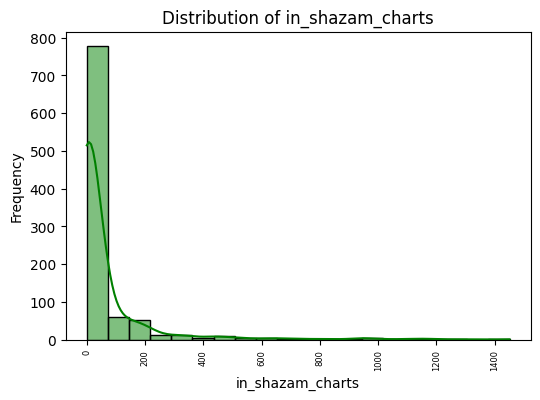

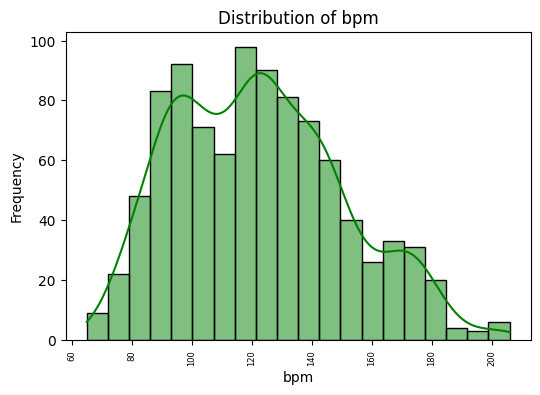

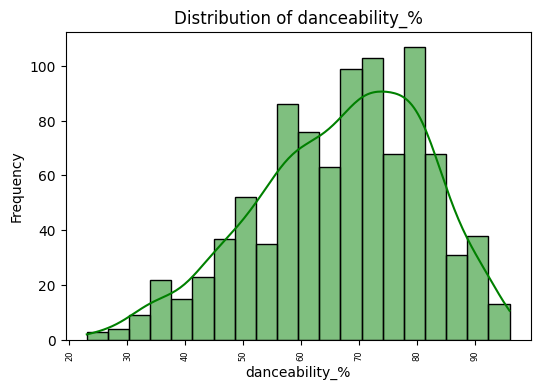

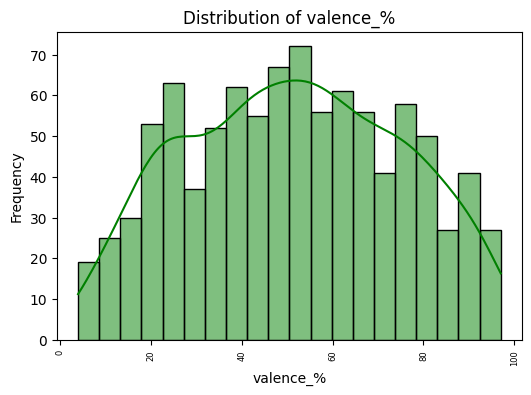

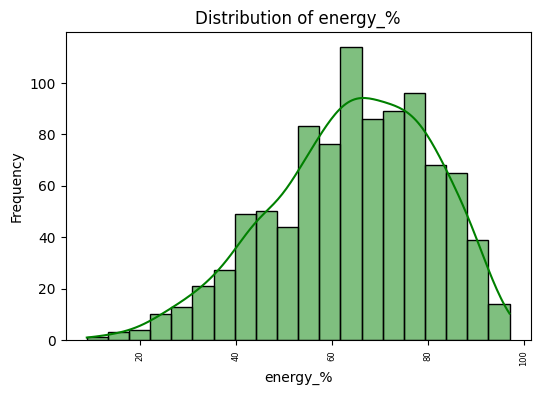

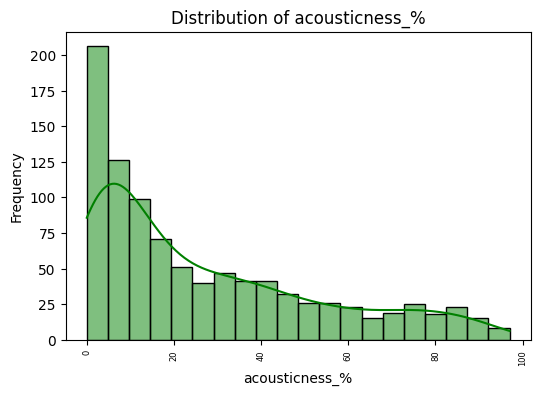

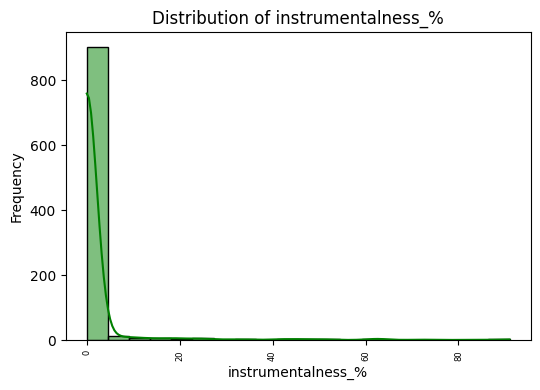

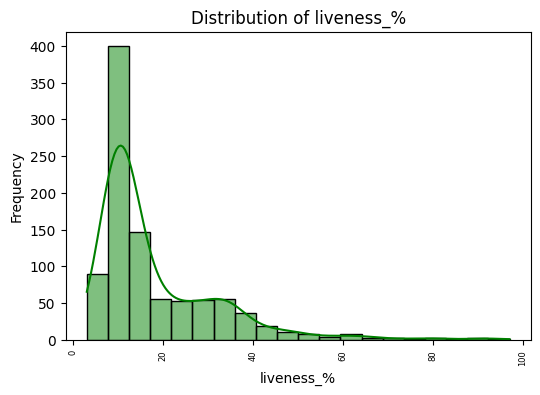

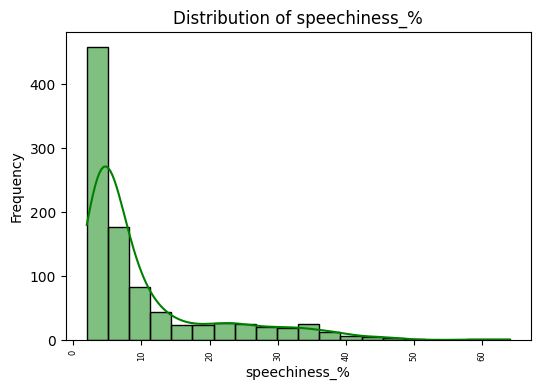

In [4]:
# Define discrete and continuous columns
discrete_columns = ['artist_count', 'released_year', 'released_month', 'released_day', 'key', 'mode']
continuous_columns = ['streams', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

# Plot distributions for discrete columns
for column in discrete_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=raw_spotify, x=column, color='green')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90, fontsize=6)
    plt.show()

# Plot distributions for continuous columns
for column in continuous_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=raw_spotify, x=column, kde=True, color='green', bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90, fontsize=6)
    plt.show()

## Feature engineering

In [5]:
# Removing columns that are not useful for our analysis
raw_spotify = raw_spotify.drop(['track_name','artist(s)_name', 'artist_count', 'released_day'], axis=1)

# Grouping songs into categories by year
raw_spotify['released_year'] = raw_spotify['released_year'].mask(raw_spotify['released_year'] < 2019, '<2019')
raw_spotify['released_year'] = raw_spotify['released_year'].replace({2019: '2019-2021', 2020: '2019-2021', 2021: '2019-2021'})

# Encoding 'released years'
raw_spotify = pd.get_dummies(data = raw_spotify, columns = ['released_year'], prefix='Released', drop_first = True, dtype = int)

# Splitting 'bpm' into categories according to https://en.wikipedia.org/wiki/Tempo
intervals = [0, 80, 108, 120, 156, float('inf')]
labels = ['46–80', '80–108', '108–120', '120–156', '168+']
raw_spotify['bpm'] = pd.cut(raw_spotify['bpm'], bins=intervals, labels=labels, right=False)

# Encoding 'bpm'
raw_spotify = pd.get_dummies(data = raw_spotify, columns = ['bpm'], drop_first = True, dtype = int)

# Encoding 'key'
raw_spotify = pd.get_dummies(data = raw_spotify, columns = ['key'], prefix='Key_', drop_first = True, dtype = int)

# Encoding 'mode'
raw_spotify = pd.get_dummies(data = raw_spotify, columns = ['mode'], prefix='Mode_', drop_first = True, dtype = int)

encoded_spotify = raw_spotify

## Feature scaling

In [6]:
sc = StandardScaler()
columns_to_scale = ['released_month', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
X = encoded_spotify.copy()
X[columns_to_scale] = sc.fit_transform(X[columns_to_scale])
# print(X)

## Correlation analysis

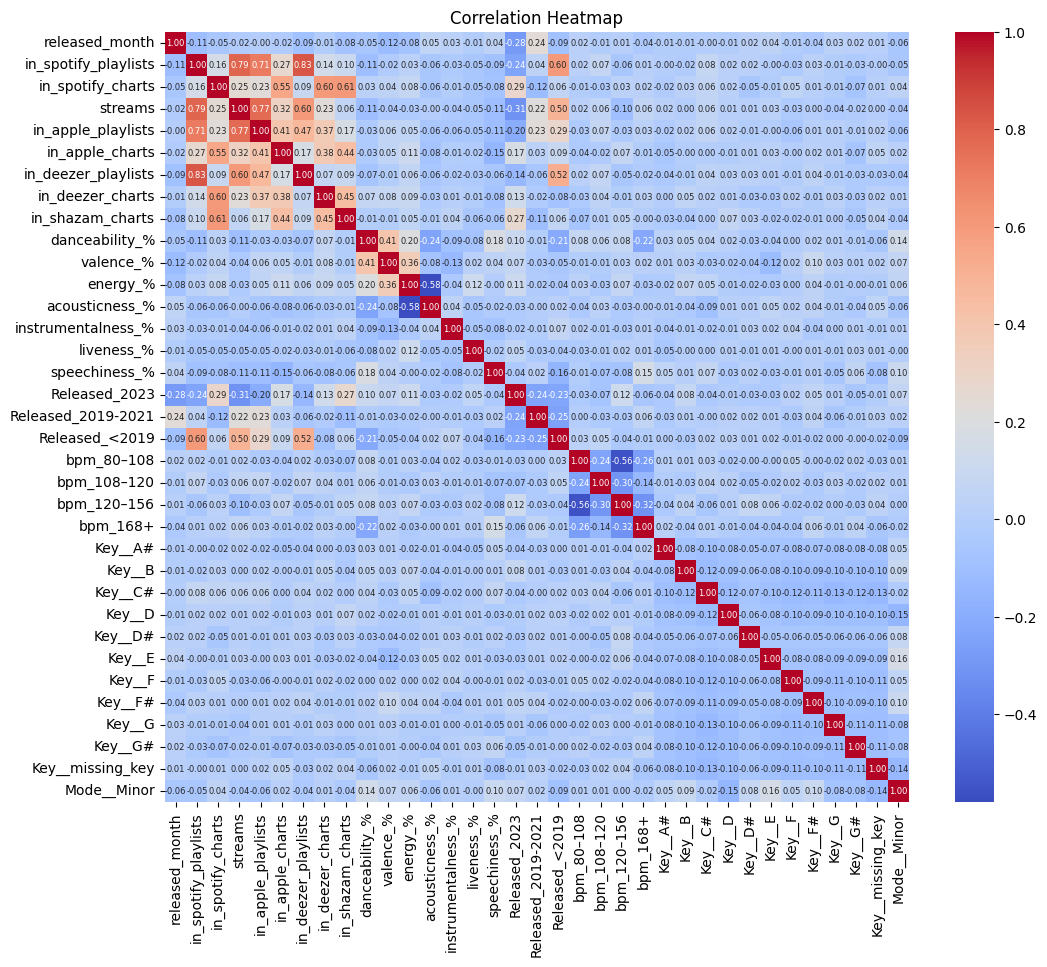

In [7]:
correlation_matrix = X.corr()
correlation_matrix = correlation_matrix.round(2)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", annot=True, annot_kws={"fontsize": 6})
plt.title('Correlation Heatmap')
plt.show()

There is correlation between total number of streams and playlists, charts and how long ago a song was released. Additionally, the energy metric is positively correlated to the valence and danceability metric as well as being negatively correlated to the acousticness metric.

## K-means clustering

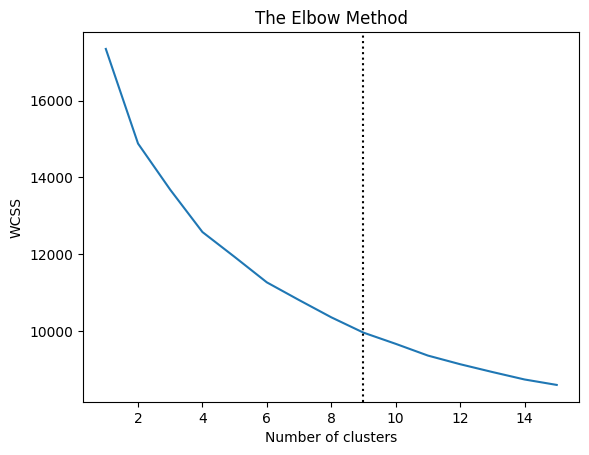

In [8]:
wcss = [] # within-cluster sum of squares
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axvline(x = 9 , color = 'black', linestyle = 'dotted')

plt.show()

#### I picked 9 clusters via the elbow method since there is a kink at number of clusters = 9.

## Dendrogram

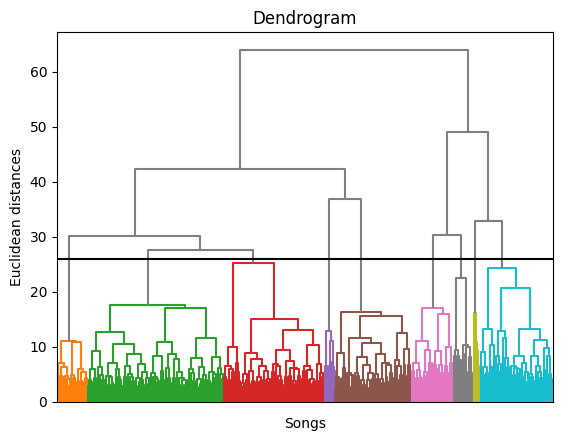

In [9]:
euclidean_distance = 26
Z = sch.linkage(X, method = 'ward')

dendrogram = sch.dendrogram(Z, leaf_font_size=0, p=10, color_threshold = euclidean_distance, above_threshold_color='gray')
plt.title('Dendrogram')
plt.xlabel('Songs')
plt.ylabel('Euclidean distances')
plt.axhline(y = euclidean_distance, color = 'black', linestyle = '-')
plt.gca().set_xticklabels([])

plt.show()

## K-means clustering

In [10]:
n_clusters = 9
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

# Adding cluster labels as a new column to the original data
X_with_labels = np.column_stack((X, cluster_labels))

# Calculating feature averages for each cluster
cluster_averages = []
for cluster in range(n_clusters):
    # Selecting data points belonging to the current cluster
    cluster_data = X_with_labels[X_with_labels[:, -1] == cluster, :-1]
    # Calculating feature averages for the current cluster
    cluster_avg = np.mean(cluster_data, axis=0)
    cluster_averages.append(cluster_avg)

cluster_df = pd.DataFrame(cluster_averages, columns=[f"Feature_{i+1}" for i in range(X.shape[1])])

cluster_df["Cluster"] = [f"Cluster {i}" for i in range(1, n_clusters + 1)]
cluster_df.set_index("Cluster", inplace=True)
column_names = X.columns.tolist()
cluster_df.columns = column_names

# cluster_df.round(2)

## Standardized Cluster Heatmap

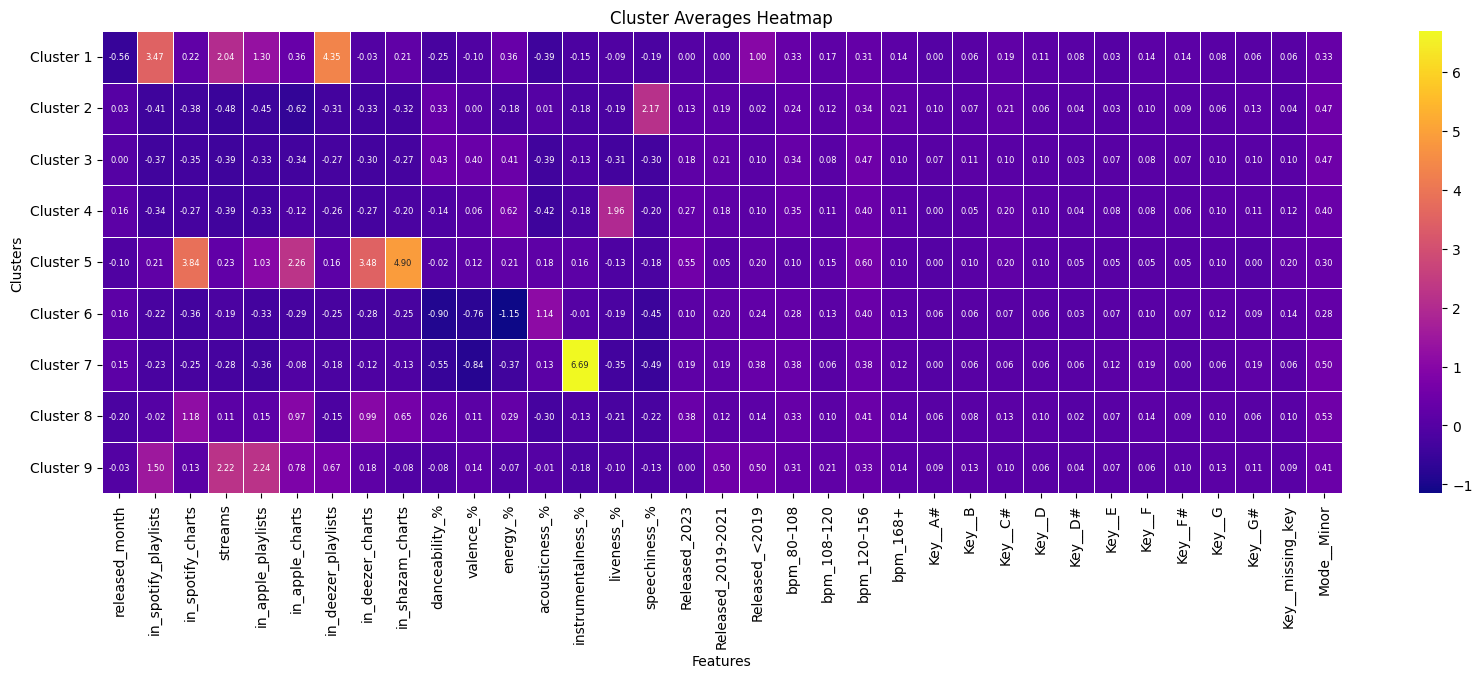

In [11]:
plt.figure(figsize=(20, 6))
sns.heatmap(cluster_df, annot=True, cmap='plasma', fmt=".2f", linewidths=0.5, annot_kws={"fontsize": 6})
plt.title('Cluster Averages Heatmap')
plt.xlabel('Features')
plt.ylabel('Clusters')
plt.show()

In [12]:
cluster_df[columns_to_scale] = sc.inverse_transform(cluster_df[columns_to_scale])
cluster_df = pd.DataFrame(cluster_df, columns = X.columns.tolist(), index = [f"Cluster {i}" for i in range(1, n_clusters + 1)])
cluster_df['streams'] = cluster_df['streams'].apply(lambda x: round(x / 1e6, 2))
cluster_df.rename(columns={'streams': 'streams_millions'}, inplace=True)

print("Cluster Averages:")
cluster_df.round(2)

Cluster Averages:


,released_month,in_spotify_playlists,in_spotify_charts,streams_millions,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,Released_2023,Released_2019-2021,Released_<2019,bpm_80–108,bpm_108–120,bpm_120–156,bpm_168+,Key__A#,Key__B,Key__C#,Key__D,Key__D#,Key__E,Key__F,Key__F#,Key__G,Key__G#,Key__missing_key,Mode__Minor
Cluster 1,4.06,32615.83,16.28,1670.31,180.64,70.28,5302.58,2.47,94.25,63.31,49.08,70.28,16.89,0.31,17.03,8.28,0.00,0.00,1.00,0.33,0.17,0.31,0.14,0.00,0.06,0.19,0.11,0.08,0.03,0.14,0.14,0.08,0.06,0.06,0.33
Cluster 2,6.15,1948.27,4.66,240.50,29.21,20.65,39.93,0.69,9.72,71.74,51.44,61.27,27.31,0.08,15.58,31.69,0.13,0.19,0.02,0.24,0.12,0.34,0.21,0.10,0.07,0.21,0.06,0.04,0.03,0.10,0.09,0.06,0.13,0.04,0.47
Cluster 3,6.04,2301.22,5.10,291.64,39.71,34.84,76.19,0.85,17.94,73.27,60.79,71.05,17.03,0.53,13.99,7.16,0.18,0.21,0.10,0.34,0.08,0.47,0.10,0.07,0.11,0.10,0.10,0.03,0.07,0.08,0.07,0.10,0.10,0.10,0.47
Cluster 4,6.60,2506.44,6.74,295.09,39.20,46.08,92.79,1.06,29.57,64.94,52.79,74.46,16.05,0.07,45.05,8.14,0.27,0.18,0.10,0.35,0.11,0.40,0.11,0.00,0.05,0.20,0.10,0.04,0.08,0.08,0.06,0.10,0.11,0.12,0.40
Cluster 5,5.70,6889.90,87.20,645.30,156.85,166.15,562.20,23.65,840.85,66.75,54.30,67.80,31.65,2.95,16.50,8.35,0.55,0.05,0.20,0.10,0.15,0.60,0.10,0.00,0.10,0.20,0.10,0.05,0.05,0.05,0.05,0.10,0.00,0.20,0.30
Cluster 6,6.60,3441.35,5.02,408.39,39.64,37.23,104.85,0.95,21.41,53.86,33.67,45.17,56.67,1.51,15.62,5.66,0.10,0.20,0.24,0.28,0.13,0.40,0.13,0.06,0.06,0.07,0.06,0.03,0.07,0.10,0.07,0.12,0.09,0.14,0.28
Cluster 7,6.56,3424.31,7.12,355.49,36.44,48.06,186.75,1.94,39.50,59.00,31.75,58.19,30.50,57.81,13.44,5.31,0.19,0.19,0.38,0.38,0.06,0.38,0.12,0.00,0.06,0.06,0.06,0.06,0.12,0.19,0.00,0.06,0.19,0.06,0.50
Cluster 8,5.33,5061.82,35.10,574.59,81.18,101.27,213.79,8.66,164.62,70.72,53.92,69.02,19.41,0.53,15.27,7.98,0.38,0.12,0.14,0.33,0.10,0.41,0.14,0.06,0.08,0.13,0.10,0.02,0.07,0.14,0.09,0.10,0.06,0.10,0.53
Cluster 9,5.91,17066.23,14.59,1769.46,261.04,91.27,1147.87,3.74,47.89,65.77,54.71,63.10,26.93,0.07,16.84,8.86,0.00,0.50,0.50,0.31,0.21,0.33,0.14,0.09,0.13,0.10,0.06,0.04,0.07,0.06,0.10,0.13,0.11,0.09,0.41


## Results of clusterization

In [13]:
# Remove '# ' in the fourth line to download the results
Clusterized_spotify_data = raw_spotify
Clusterized_spotify_data['Cluster'] = np.array(cluster_labels)
# Clusterized_spotify_data.to_excel('Clusterized_spotify_data.xlsx', index=False)

print("Number of songs per cluster:")
Clusterized_spotify_data['Cluster'].value_counts()

Number of songs per cluster:


Cluster
2    298
5    177
7    125
1    112
3     98
8     70
0     36
4     20
6     16
Name: count, dtype: int64

# Principal Component Analysis (PCA)

In [14]:
factor_attributes_used = []
for i in range(35):
    factor_attributes_used.append(i)

pca = PCA(n_components=len(factor_attributes_used))
unrotated_results = pca.fit_transform(X.values)
components_table = pd.DataFrame()
components_table['Title'] = ['Component {num}'.format(num=i) for i in range(1, len(factor_attributes_used) + 1)]

components_table['Eigenvalue'] = pca.explained_variance_
components_table['Explained %'] = 100 * pca.explained_variance_ratio_
components_table['Cumulative Explained %'] = 100 * pca.explained_variance_ratio_.cumsum()

components_table.round(2)

,Title,Eigenvalue,Explained %,Cumulative Explained %
0,Component 1,3.76,20.61,20.61
1,Component 2,2.22,12.19,32.80
2,Component 3,1.92,10.51,43.31
3,Component 4,1.23,6.72,50.03
4,Component 5,1.07,5.86,55.89
5,Component 6,1.04,5.69,61.58
6,Component 7,0.95,5.18,66.76
7,Component 8,0.87,4.75,71.52
8,Component 9,0.66,3.60,75.12
9,Component 10,0.62,3.40,78.52


### Using 3 PCA component analysis for the purpose of visualizing clusters in 3-dimensional space, although first three components only explain 43.31% of variance.

In [15]:
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X)

# Creating traces for each cluster
trace = []
for cluster in range(1, n_clusters+1):
    cluster_indices = cluster_labels == cluster
    trace.append(go.Scatter3d(
        x=X_3d[cluster_indices, 0],
        y=X_3d[cluster_indices, 1],
        z=X_3d[cluster_indices, 2],
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.5,
            color=cluster,
            colorscale='Viridis'
        ),
        name=f'Cluster {cluster}'
    ))

# Creating layout for the plot
layout = go.Layout(
    title='K-means Clustering Visualization (3D PCA)',
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    )
)

# Creating figure
fig = go.Figure(data=trace, layout=layout)
fig.show()

In [16]:
# We can pick the number of factors based on min varience or min eigenvalues
factor_selection_criterion = "variance" # or "eigenvalue"

min_eigenvalue = 1.0
minimum_variance_explained = 90

# the number of variables with Eigenvalue > min_eigenvalue
if factor_selection_criterion == "eigenvalue":
  factors_selected = len(components_table[components_table["Eigenvalue"] > min_eigenvalue])

# Number of variables required for cumulative variance > minimum_variance_explained
if factor_selection_criterion == "variance":
  factors_selected = min(len(components_table['Cumulative Explained %']), len(components_table['Cumulative Explained %']) + 1 - len(components_table[components_table['Cumulative Explained %'] >= minimum_variance_explained]))

print("Number of factors selected: %d." % factors_selected)

Number of factors selected: 16.


#### Choosing top 16 components because they explain >90% of variance.

Text(0.5, 1.0, 'Scree Plot')

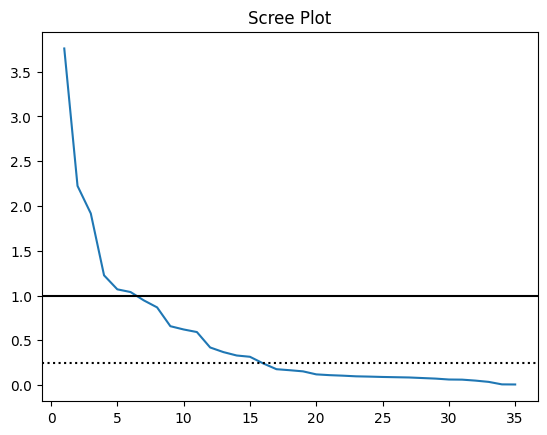

In [17]:
plt.plot(range(1, len(factor_attributes_used)+1), components_table['Eigenvalue'])

plt.axhline(y = 1, color = 'black', linestyle = '-')
plt.axhline(y = components_table.iloc[factors_selected - 1, 1] , color = 'black', linestyle = 'dotted')

plt.title("Scree Plot")

In [18]:
rotation_used = "varimax"

factor_analysis = FactorAnalysis(rotation=rotation_used, n_components=factors_selected)
factor_analysis_results = factor_analysis.fit_transform(X.values)
fa_results = pd.DataFrame()
fa_results['Vars'] = X.columns[factor_attributes_used].values

res = factor_analysis.components_.round(2)
for i in range(factors_selected):
  fa_results['Component %d' % (i+1)] = res[i]

# Displaying table
# fa_results

In [19]:
for i in range(factors_selected):
  filtered_weights = res[i]
  filtered_weights[abs(filtered_weights) < 0.1] = np.nan
  fa_results['Component %d' % (i+1)] = filtered_weights
# fa_results

# Removing low weights
fa_results.set_index('Vars', inplace=True)
fa_results.dropna(axis=0, how='all', inplace=True)
fa_results

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,Component 13,Component 14,Component 15,Component 16
Vars,,,,,,,,,,,,,,,,
released_month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.11,NaN,NaN,NaN,NaN,0.48,NaN,NaN,NaN
in_spotify_playlists,NaN,0.95,NaN,NaN,NaN,NaN,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_spotify_charts,NaN,0.12,NaN,NaN,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.13,NaN
streams,NaN,0.87,NaN,NaN,0.13,NaN,-0.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.23,-0.10
in_apple_playlists,NaN,0.78,NaN,NaN,0.19,NaN,-0.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10
in_apple_charts,NaN,0.27,NaN,NaN,0.58,NaN,-0.17,NaN,0.10,NaN,NaN,NaN,NaN,NaN,NaN,-0.11
in_deezer_playlists,NaN,0.82,NaN,NaN,NaN,NaN,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.13,NaN
in_deezer_charts,NaN,0.15,NaN,NaN,0.66,NaN,-0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.34
in_shazam_charts,NaN,NaN,NaN,NaN,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.35,NaN


### Reconstructing the original data from PCA-transformed components

In [20]:
spotify_PCA = pd.DataFrame()

for i in range(factors_selected):
  spotify_PCA['Component %d' % (i+1)] = factor_analysis_results.T[i]

spotify_PCA.round(2)

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,Component 13,Component 14,Component 15,Component 16
0,-0.73,-1.03,0.26,-0.40,6.04,-0.26,1.37,1.14,0.42,-0.28,0.32,0.27,0.26,0.34,-0.03,-1.51
1,0.78,-0.68,-1.37,-0.01,2.16,-0.67,0.08,0.05,0.36,1.95,0.58,0.19,-0.73,0.01,0.59,-0.00
2,-0.88,-0.83,0.12,-0.33,5.17,0.17,0.48,-1.05,0.34,-0.26,0.27,-0.59,0.01,0.28,1.16,-0.55
3,1.10,0.04,0.91,1.79,3.91,-0.48,0.09,0.14,0.62,-0.56,0.37,-1.00,1.62,0.20,-0.20,-1.26
4,-1.02,-0.50,0.15,-0.15,2.40,-0.79,-0.13,-1.13,0.11,-0.32,-0.71,-0.33,-0.40,-0.05,0.88,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,-1.23,-0.47,0.17,0.01,-0.48,1.23,-0.21,-0.88,-0.08,-0.02,0.50,-0.10,0.33,0.03,0.40,0.69
948,0.69,-0.58,0.70,1.92,-0.48,2.12,0.31,-0.97,0.28,-0.35,0.29,-1.54,-0.11,-0.07,0.16,0.37
949,0.71,-0.63,-1.20,0.29,-0.60,-0.52,0.35,0.62,-0.29,2.00,0.74,0.75,0.56,0.09,0.12,0.06
950,0.70,-0.51,-1.22,0.22,-0.55,-0.79,0.05,0.37,-0.19,1.98,0.70,0.62,0.42,0.06,0.18,0.10


##Results


As a result of the analysis I outlined 10 clusters of songs that made it into the top spotify songs of 2023.

**Cluster characteristics:**

Cluster 1 (**Oldies but goldies**) -> 36 songs, Released before 2020, Average total number of streams = 1.67 BN, High on spotify, apple and deezer playlists, Low on charts.

Cluster 2 (**Unpopular rap**) -> 112 songs, Somewhat high on danceability, Very high on speechiness, Low on streams, playlists and charts.

Cluster 3 (**Upbeat**)-> 298 songs, High danceability and valence metrics, Low on streams, playlists and charts.

Cluster 4 (**Performances**)-> 98 songs, High liveness metric, Relatively high energy metric, Low on streams, playlists and charts.

Cluster 5 (**Rising starts**) -> 20 songs, Released mostly in 2023 or 2022, High on spotify, apple and deezer charts, Extremely high on shazam charts, Mostly in the 120-156 bpm category.

Cluster 6 (**Acoustic**) -> 177 songs, High on acousticness metric, Low on energy, valence, daceability and speechiness, Mostly played in major mode, Low on streams, playlists and charts.

Cluster 7 (**Instrumental**) -> 16 songs, Very high on instrumnetalness metric, Low on energy, valence, daceability and speechiness, Low on streams, playlists and charts.

Cluster 8 (**Plateaued stars**) -> 125 songs, Released mostly in 2023 or 2022, High on spotify, apple and deezer charts, Somewhat high on shazaam charts, Low on streams, playlists.

Cluster 9 (**Popular hits**) -> 70 songs, Released before 2022, Average total number of streams = 1.77 BN, High on apple charts and spotify, apple, deezer playlists.